In [25]:
import pickle
import pandas as pd
import glob
import os
import fnmatch
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Rectangle
import numpy as np

In [26]:
mpl.rcParams["text.usetex"] = True
mpl.rcParams["axes.formatter.use_mathtext"] = True

### Optimality Gap vs. Time

In [27]:
path_stem = "demonstrate_results"

# Find the CSV files with names containing "pc=NoPreconditioner"
no_preconditioner_files = glob.glob(os.path.join(path_stem, '*pc=NoPreconditioner*history.csv'))
no_preconditioner_dfs = [pd.read_csv(file) for file in no_preconditioner_files]

# Find the CSV files with names containing "pc=PartialCholesky"
pc_files = glob.glob(os.path.join(path_stem, '*pc=PartialCholesky*history.csv'))
pc_dfs = [pd.read_csv(file) for file in pc_files]

# Find the CSV files with names containing "pc=Nystrom"
nystrom_files = glob.glob(os.path.join(path_stem, '*pc=Nystrom*history.csv'))
nystrom_dfs = [pd.read_csv(file) for file in nystrom_files]

In [28]:
latest_no_preconditioner_file = max(no_preconditioner_files, key=os.path.getmtime)
latest_pc_file = max(pc_files, key=os.path.getmtime)
latest_nystrom_file = max(nystrom_files, key=os.path.getmtime)

print("Latest No Preconditioner File:\n", os.path.basename(latest_no_preconditioner_file))
print("Latest PC File:\n", os.path.basename(latest_pc_file))
print("Latest Nystrom File:\n", os.path.basename(latest_nystrom_file))

Latest No Preconditioner File:
 ts=2024-03-22--14:16:23_prob=risk_model_m=10000_n=50000_k=400_pc=NoPreconditioner_rank=0_tol=1e-08_history.csv
Latest PC File:
 ts=2024-03-22--22:51:03_prob=risk_model_m=10000_n=50000_k=400_pc=PartialCholesky_rank=20_tol=1e-08_history.csv
Latest Nystrom File:
 ts=2024-03-22--13:44:48_prob=risk_model_m=10000_n=50000_k=400_pc=Nystrom_rank=20_tol=1e-08_history.csv


In [29]:
filename = os.path.basename(latest_nystrom_file)

# Extract the values of m and n from the filename
m = int(filename.split('_m=')[1].split('_n=')[0])
n = int(filename.split('_n=')[1].split('_k=')[0])

print("Value of m:", m)
print("Value of n:", n)

Value of m: 10000
Value of n: 50000


In [30]:
nys_df = pd.read_csv(latest_nystrom_file)
nys_df.head()

,iter,primal_feasibility,dual_feasibility,optimality_gap,inner_iter_predictor,inner_iter_corrector,krylov_tol,rank,construct_precond_elapsed,CG_solving_elapsed,cumulative_time
0,1,0.653322,0.414190,0.008441,7,7,0.000001,20,2.988869,2.416849,5.722367
1,2,0.346884,0.363593,0.012161,32,30,0.000001,20,1.640562,9.764489,17.435532
2,3,0.004341,0.095608,0.002832,34,36,0.000001,20,1.643214,10.888854,30.138880
3,4,0.002169,0.004196,0.000511,135,144,0.000001,20,1.658387,42.653110,74.614359
4,5,0.000441,0.001252,0.000145,135,146,0.000001,20,1.647753,42.783321,119.230124


In [31]:
noP_df = pd.read_csv(latest_no_preconditioner_file)
noP_df.head()

,iter,primal_feasibility,dual_feasibility,optimality_gap,inner_iter_predictor,inner_iter_corrector,krylov_tol,rank,construct_precond_elapsed,CG_solving_elapsed,cumulative_time
0,1,0.653318,0.414181,0.008442,47,58,0.000001,0,0.004828,15.526397,15.850770
1,2,0.346872,0.363582,0.012162,137,142,0.000001,0,0.004961,41.586672,57.747211
2,3,0.004341,0.095607,0.002832,114,106,0.000001,0,0.004273,34.759907,92.678512
3,4,0.002169,0.004196,0.000511,217,225,0.000001,0,0.005148,69.391242,162.245061
4,5,0.000441,0.001252,0.000145,146,162,0.000001,0,0.004199,49.074097,211.496738


In [32]:
port_fig_path = "../../plots/fig_portfolio.pdf"

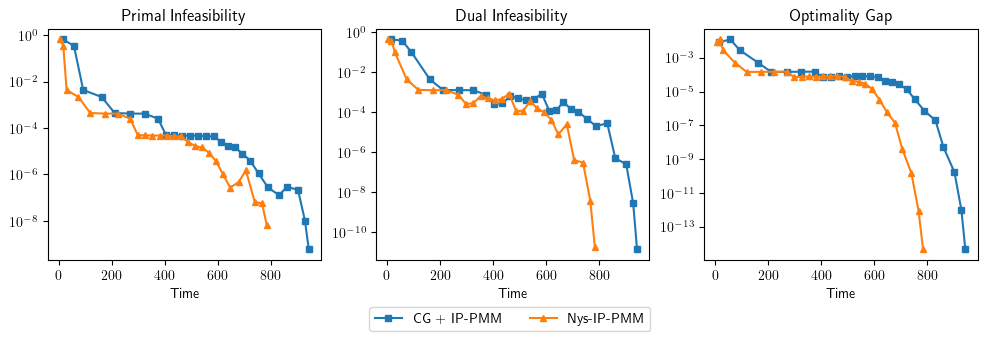

In [34]:
fig, axes = plt.subplots(1, 3, sharex=True, sharey=False, figsize=(12, 3))

# Primal infeasibility
axes[0].plot(noP_df['cumulative_time'], noP_df['primal_feasibility'], marker='s', markersize=4, linestyle='-', label='CG + IP-PMM')
axes[0].plot(nys_df['cumulative_time'], nys_df['primal_feasibility'], marker='^', markersize=4, linestyle='-', label='Nys-IP-PMM')
axes[0].set_title('Primal Infeasibility')
axes[0].set_xlabel('Time')
axes[0].set_yscale('log')

# Dual infeasibility
axes[1].plot(noP_df['cumulative_time'], noP_df['dual_feasibility'], marker='s', markersize=4, linestyle='-', label='CG + IP-PMM')
axes[1].plot(nys_df['cumulative_time'], nys_df['dual_feasibility'], marker='^', markersize=4, linestyle='-', label='Nys-IP-PMM')
axes[1].set_title('Dual Infeasibility')
axes[1].set_xlabel('Time')
axes[1].set_yscale('log')

# Optimality gap
axes[2].plot(noP_df['cumulative_time'], noP_df['optimality_gap'], marker='s', markersize=4, linestyle='-', label='CG + IP-PMM')
axes[2].plot(nys_df['cumulative_time'], nys_df['optimality_gap'], marker='^', markersize=4, linestyle='-', label='Nys-IP-PMM')
axes[2].set_title('Optimality Gap')
axes[2].set_xlabel('Time')
axes[2].set_yscale('log')

# Create a single legend for the entire figure
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=2, bbox_to_anchor=(0.51, -0.15))

plt.savefig(port_fig_path, format='pdf', bbox_inches = 'tight')

plt.show()